## 17 MON FEB 2025


1. Get the ASOS data (5 min)
2. Get the reanalysis CDS (ERA5 - hourly)
3. load the datasets and combine
4. correlation between reanlysis and observation

In [2]:
#importing libraries 

import pandas as pd # for reading csv
import xarray as xr # for reading netcdf 



In [15]:

asos_data = pd.read_csv('MLB.csv',na_values='M')
asos_data['valid'] = pd.to_datetime(asos_data['valid']) # converting the time column to pandas datetime object

asos_data

,station,valid,lon,lat,tmpf,relh,drct,sknt,p01m
0,MLB,2024-12-01 00:00:00,-80.6453,28.1028,NaN,NaN,340.0,10.0,NaN
1,MLB,2024-12-01 00:05:00,-80.6453,28.1028,NaN,NaN,340.0,10.0,NaN
2,MLB,2024-12-01 00:10:00,-80.6453,28.1028,NaN,NaN,340.0,9.0,NaN
3,MLB,2024-12-01 00:15:00,-80.6453,28.1028,NaN,NaN,340.0,8.0,NaN
4,MLB,2024-12-01 00:20:00,-80.6453,28.1028,NaN,NaN,330.0,11.0,NaN
...,...,...,...,...,...,...,...,...,...
8433,MLB,2024-12-30 23:35:00,-80.6453,28.1028,NaN,NaN,80.0,5.0,NaN
8434,MLB,2024-12-30 23:40:00,-80.6453,28.1028,NaN,NaN,80.0,5.0,NaN
8435,MLB,2024-12-30 23:45:00,-80.6453,28.1028,NaN,NaN,80.0,5.0,NaN
8436,MLB,2024-12-30 23:50:00,-80.6453,28.1028,NaN,NaN,80.0,5.0,NaN


In [17]:
# load the ASOS 5 min data 

asos_data = asos_data.set_index('valid') # replaced the number based index with time 

asos_data

,station,lon,lat,tmpf,relh,drct,sknt,p01m
valid,,,,,,,,
2024-12-01 00:00:00,MLB,-80.6453,28.1028,NaN,NaN,340.0,10.0,NaN
2024-12-01 00:05:00,MLB,-80.6453,28.1028,NaN,NaN,340.0,10.0,NaN
2024-12-01 00:10:00,MLB,-80.6453,28.1028,NaN,NaN,340.0,9.0,NaN
2024-12-01 00:15:00,MLB,-80.6453,28.1028,NaN,NaN,340.0,8.0,NaN
2024-12-01 00:20:00,MLB,-80.6453,28.1028,NaN,NaN,330.0,11.0,NaN
...,...,...,...,...,...,...,...,...
2024-12-30 23:35:00,MLB,-80.6453,28.1028,NaN,NaN,80.0,5.0,NaN
2024-12-30 23:40:00,MLB,-80.6453,28.1028,NaN,NaN,80.0,5.0,NaN
2024-12-30 23:45:00,MLB,-80.6453,28.1028,NaN,NaN,80.0,5.0,NaN


<Axes: xlabel='valid'>

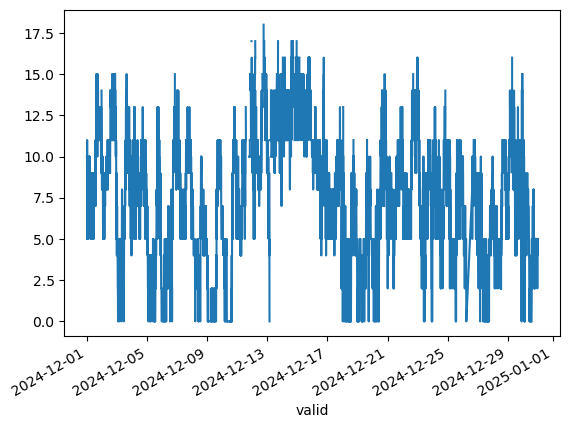

In [18]:
# a quick preview 

asos_data['sknt'].plot()

<Axes: xlabel='valid'>

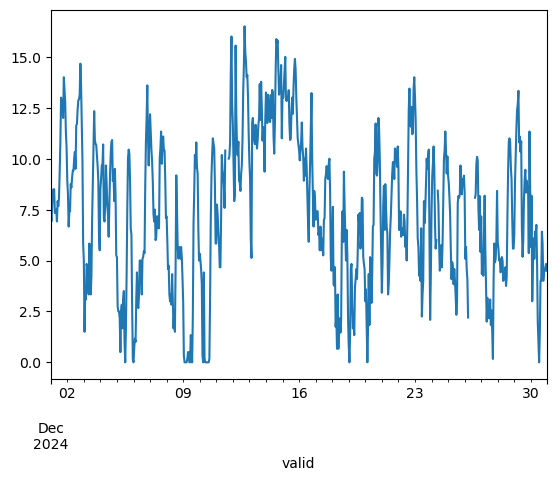

In [34]:
 # converting asos 5 min data in to hourly 

asos_without_station = asos_data.drop(['station','lon','lat'],axis=1) # dropping station since it's a string 

asos_hourly = asos_without_station.resample('1h').mean()

asos_hourly['sknt'].plot() # to plot 

,lon,lat,tmpf,relh,drct,sknt,p01m
valid,,,,,,,
2024-12-01 00:00:00,-80.6453,28.1028,NaN,NaN,340.0,10.0,NaN
2024-12-01 00:05:00,-80.6453,28.1028,NaN,NaN,340.0,10.0,NaN
2024-12-01 00:10:00,-80.6453,28.1028,NaN,NaN,340.0,9.0,NaN
2024-12-01 00:15:00,-80.6453,28.1028,NaN,NaN,340.0,8.0,NaN
2024-12-01 00:20:00,-80.6453,28.1028,NaN,NaN,330.0,11.0,NaN
...,...,...,...,...,...,...,...
2024-12-30 23:35:00,-80.6453,28.1028,NaN,NaN,80.0,5.0,NaN
2024-12-30 23:40:00,-80.6453,28.1028,NaN,NaN,80.0,5.0,NaN
2024-12-30 23:45:00,-80.6453,28.1028,NaN,NaN,80.0,5.0,NaN


In [36]:
## 2. read the netcdf file 

era_reanalysis = xr.open_dataset('era_2024_dec.nc')# read the dataset

era_reanalysis

<xarray.Dataset> Size: 167kB
Dimensions:     (valid_time: 744, latitude: 5, longitude: 5)
Coordinates:
    number      int64 8B ...
  * valid_time  (valid_time) datetime64[ns] 6kB 2024-12-01 ... 2024-12-31T23:...
  * latitude    (latitude) float64 40B 28.0 27.75 27.5 27.25 27.0
  * longitude   (longitude) float64 40B -81.0 -80.75 -80.5 -80.25 -80.0
    expver      (valid_time) <U4 12kB ...
Data variables:
    u10         (valid_time, latitude, longitude) float32 74kB ...
    v10         (valid_time, latitude, longitude) float32 74kB ...
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-02-17T17:10 GRIB to CDM+CF via cfgrib-0.9.1...

In [39]:
# select nearest era5 point 

era_reanalysis_mlb = era_reanalysis.sel(longitude=-80.6,latitude=28.10,method='nearest')

era_reanalysis_mlb

<xarray.Dataset> Size: 24kB
Dimensions:     (valid_time: 744)
Coordinates:
    number      int64 8B ...
  * valid_time  (valid_time) datetime64[ns] 6kB 2024-12-01 ... 2024-12-31T23:...
    latitude    float64 8B 28.0
    longitude   float64 8B -80.5
    expver      (valid_time) <U4 12kB ...
Data variables:
    u10         (valid_time) float32 3kB ...
    v10         (valid_time) float32 3kB ...
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-02-17T17:10 GRIB to CDM+CF via cfgrib-0.9.1...

In [44]:

era_reanalysis_mlb_tabular = era_reanalysis.to_dataframe()

era_reanalysis_mlb_tabular.reset_index().set_index('valid_time').drop(['latitude','longitude','number','expver'],axis=1)


,u10,v10
valid_time,,
2024-12-01 00:00:00,-0.044952,-3.145279
2024-12-01 00:00:00,0.056610,-4.211685
2024-12-01 00:00:00,-0.612335,-5.589615
2024-12-01 00:00:00,-2.072296,-6.547623
2024-12-01 00:00:00,-4.140656,-6.876724
...,...,...
2024-12-31 23:00:00,2.901154,0.961670
2024-12-31 23:00:00,3.188263,1.358154
2024-12-31 23:00:00,2.485138,1.607178
